In [166]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal






In [167]:
a1 = 1
a2 = 3

In [168]:
t = np.arange (0,5,0.0001)
print (t)

[0.0000e+00 1.0000e-04 2.0000e-04 ... 4.9997e+00 4.9998e+00 4.9999e+00]


In [169]:
x = 1.5*np.sin(2*np.pi*a1*t) - 3*np.sin(2*np.pi*a2*t) + 2*np.sin(2*np.pi*(a1+a2)*t)

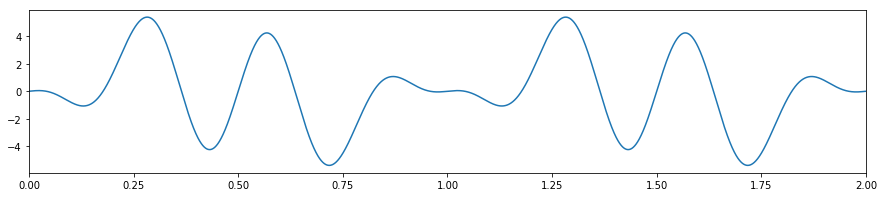

In [170]:
plt.figure(figsize=(15,3))
plt.xlim(0,2)
plt.plot(t,x)
plt.show()

In [180]:
fs = 24
n = np.arange (0,5,1/fs)


In [178]:
sig_amost = 1.5*np.sin(2*np.pi*a1*n) - 3*np.sin(2*np.pi*a2*n) + 2*np.sin(2*np.pi*(a1+a2)*n)

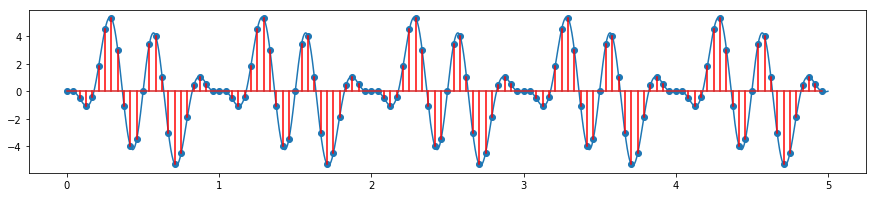

In [179]:
plt.figure(figsize=(15,3))

plt.plot(t,x)

plt.stem(n,sig_amost,"r")
plt.show()

In [181]:
x1_fourier = np.fft.fft(sig_amost)
x1_fourierfreq = np.fft.fftfreq(len(sig_amost), 1/(2*np.pi)) #frequencias no dominio DISCRETO


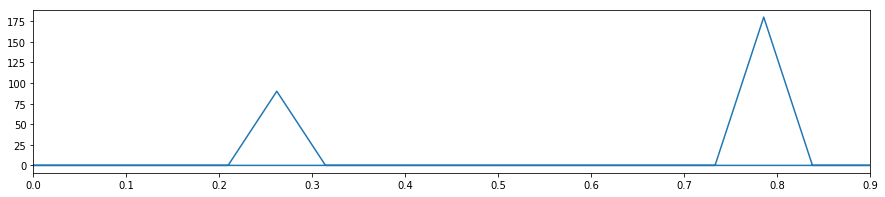

In [218]:
plt.figure(figsize=(15,3))
plt.plot(x1_fourierfreq, abs(x1_fourier))
plt.xlim(0,0.9)
plt.ylim()
plt.show()

In [155]:

numtaps = 3
fs = 20
f = sig_amost


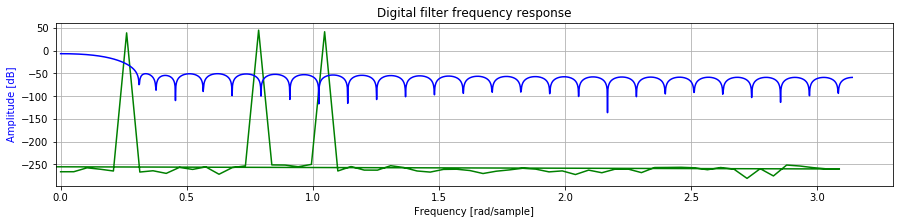

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from scipy.signal import firwin
import matplotlib.pyplot as plt

def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False,
                  window=window, scale=False)
    return taps

fs = 20
lowcut = 0.2
highcut = 0.32
ntaps = 55

taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs)
remez_width = 1.0


w, h = freqz(taps_hamming, 0.5, worN=2000)
#plt.plot((fs * 0.5 / np.pi) * w, abs(h),label="Hamming Window")         
             
#plt.xlim(0,0.9)           
#plt.ylim(0, 1.1)
#plt.grid(True)
#plt.legend()
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Gain')
#plt.title('Frequency response of several FIR filters, %d taps' % numtaps)
#plt.show()


fig = plt.figure(figsize=(15,3))
plt.title('Digital filter frequency response')
#ax1 = fig.add_subplot(111)

plt.plot(x1_fourierfreq, 20 * np.log10(abs(x1_fourier)), 'g')

plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Amplitude [dB]', color='b')
plt.xlabel('Frequency [rad/sample]')

#ax2 = ax1.twinx()
#angles = np.unwrap(np.angle(h))
#plt.plot(w, angles, 'g')
#plt.ylabel('Angle (radians)', color='g')
plt.grid()
plt.axis('tight')
plt.xlim(-0.02,3.3)
plt.show()